In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="n_jobs value 1 overridden to 1 by setting random_state.")
warnings.filterwarnings("ignore", message="MiniBatchKMeans is known to have a memory leak on Windows with MKL")

from sklearn.utils.multiclass import unique_labels


import time
import os
os.environ["OMP_NUM_THREADS"] = "2"

from scipy import stats
from scipy.stats import *
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import umap


RECUPERO I 4 DATASET DIVISI PER ZONA DEL TUMORE CHE CONTENGONO SOLO I PAZIENTI CHE HANNO AVUTO UNA RECIDIVA DEL TUMORE

In [10]:
df_oc_recidiva = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_oc_features.csv", index_col=0)

In [11]:
df_hy_recidiva = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_hy_features.csv", index_col=0)

In [12]:
df_la_recidiva = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_la_features.csv", index_col=0)

In [13]:
df_op_recidiva = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\recidivi_op_features.csv", index_col=0)

In [182]:
dataset_for_ari = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\pazienti_con_recidiva_colonne_ARI.csv", index_col=0)

In [17]:
dataset_for_ari

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS148,oc,SS_UDUS148,UDUS,SE_UDUS_PROSP,2018-01-06,73,2016-03-01,UDUS,Female,C04.9,...,0,0,1,1,0,0,0,0,0,2018
SS_INT_MI_0045,oc,SS_INT_MI_0045,INT,SE_INT_PROSP,2017-11-14,66,2015-10-01,INT,Female,C04,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_MI_0103,oc,SS_INT_MI_0103,INT,SE_INT_PROSP,2017-11-14,75,2016-02-01,INT,Female,C06.2,...,0,0,0,0,0,1,0,0,0,2017
SS_INT_MI_0055,oc,SS_INT_MI_0055,INT,SE_INT_PROSP,2017-11-14,68,2016-04-15,INT,Male,C01,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_0064,oc,SS_INT_0064,INT,SE_INT_PROSP,2017-08-04,32,2017-05-17,INT,Male,C02.1,...,0,0,1,0,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,la,SS_VUMC_HPL_7464,VUMC,SE_VUMC_RETRO,2018-05-14,71,2011-10-07,VUMC,Female,C32.1,...,0,0,0,0,0,0,0,1,0,2018
SS_VUMC_HPL_3711,la,SS_VUMC_HPL_3711,VUMC,SE_VUMC_RETRO,2018-05-16,85,2013-11-11,VUMC,Male,C32.1,...,0,0,1,0,0,1,0,0,0,2018
SS_VUMC_HPL_8612,la,SS_VUMC_HPL_8612,VUMC,SE_VUMC_RETRO,2018-05-16,57,2014-05-05,VUMC,Male,C32.0,...,0,0,0,0,1,0,0,0,0,2018
SS_VUMC_HPL_4174,la,SS_VUMC_HPL_4174,VUMC,SE_VUMC_RETRO,2018-05-17,66,2014-08-12,VUMC,Female,C32.0,...,0,0,1,0,0,1,0,0,0,2018


In [313]:
df_la = dataset_for_ari[dataset_for_ari['Type'] == 'la']
df_la.index

Index(['SS_UDUS129', 'SS_MAASTRO_215', 'SS_MAASTRO_416', 'SS_MAASTRO_8118',
       'SS_INT_MI_0034', 'SS_INT_0236', 'SS_INT_0303', 'SS_INT_0280',
       'SS_INT_0318', 'SS_INT_0516', 'SS_INT_0273', 'SS_SBA0082',
       'SS_INT_MI_0088', 'SS_INT_MI_0128', 'SS_INT_MI_0224', 'SS_INT_0079',
       'SS_INT_0180', 'SS_INT_0126', 'SS_INT_0172', 'SS_INT_0277',
       'SS_INT_0359', 'SS_INT_0335', 'SS_UDUS40', 'SS_MAASTRO_9495',
       'SS_MAASTRO_8534', 'SS_MAASTRO_6983', 'SS_MAASTRO_6417',
       'SS_MAASTRO_9474', 'SS_MAASTRO_7347', 'SS_MAASTRO_9983',
       'SS_MAASTRO_5979', 'SS_MAASTRO_4661', 'SS_MAASTRO_7303',
       'SS_MAASTRO_1257', 'SS_MAASTRO_272', 'SS_MAASTRO_7006',
       'SS_MAASTRO_8623', 'SS_MAASTRO_5470', 'SS_MAASTRO_7048',
       'SS_MAASTRO_4462', 'SS_MAASTRO_576', 'SS_MAASTRO_1283',
       'SS_MAASTRO_6972', 'SS_MAASTRO_7711', 'SS_MAASTRO_6489',
       'SS_MAASTRO_9255', 'SS_MAASTRO_7147', 'SS_MAASTRO_5281',
       'SS_MAASTRO_969', 'SS_VUMC_HPL_8569', 'SS_VUMC_HPL_7423',
 

In [311]:
df_la_recidiva_1000.index

Index(['SS_UDUS129', 'SS_MAASTRO_215', 'SS_MAASTRO_416', 'SS_MAASTRO_8118',
       'SS_INT_MI_0034', 'SS_INT_0236', 'SS_INT_0303', 'SS_INT_0280',
       'SS_INT_0318', 'SS_INT_0516', 'SS_INT_0273', 'SS_SBA0082',
       'SS_INT_MI_0088', 'SS_INT_MI_0128', 'SS_INT_MI_0224', 'SS_INT_0079',
       'SS_INT_0180', 'SS_INT_0126', 'SS_INT_0172', 'SS_INT_0277',
       'SS_INT_0359', 'SS_INT_0335', 'SS_UDUS40', 'SS_MAASTRO_9495',
       'SS_MAASTRO_8534', 'SS_MAASTRO_6983', 'SS_MAASTRO_6417',
       'SS_MAASTRO_9474', 'SS_MAASTRO_7347', 'SS_MAASTRO_9983',
       'SS_MAASTRO_5979', 'SS_MAASTRO_4661', 'SS_MAASTRO_7303',
       'SS_MAASTRO_1257', 'SS_MAASTRO_272', 'SS_MAASTRO_7006',
       'SS_MAASTRO_8623', 'SS_MAASTRO_5470', 'SS_MAASTRO_7048',
       'SS_MAASTRO_4462', 'SS_MAASTRO_576', 'SS_MAASTRO_1283',
       'SS_MAASTRO_6972', 'SS_MAASTRO_7711', 'SS_MAASTRO_6489',
       'SS_MAASTRO_9255', 'SS_MAASTRO_7147', 'SS_MAASTRO_5281',
       'SS_MAASTRO_969', 'SS_VUMC_HPL_8569', 'SS_VUMC_HPL_7423',
 

__________________________________________________________

UTILIZZO QUATTRO DATASET DISTINTI, SUDDIVISI IN BASE ALLA ZONA DEL TUMORE E CHE HANNO AVUTO UNA RECIDIVA.
QUESTI DATASET CONTENGONO 1000 FEATURES GENOMICHE, SELEZIONATE IN BASE AL COEFFICIENTE DI VARIAZIONE PER IDENTIFICARE LE PIÙ SIGNIFICATIVE.









In [59]:
df_oc_recidiva_1000 = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_oc_recidiva_1000.csv", index_col=0)

In [61]:
df_hy_recidiva_1000 = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_hy_recidiva_1000.csv", index_col=0)

In [63]:
df_la_recidiva_1000 = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_la_recidiva_1000.csv", index_col=0)

In [65]:
df_op_recidiva_1000 = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_op_recidiva_1000.csv", index_col=0)

In [67]:
df_hy_recidiva_1000 

,4923,5930,17921,3238,4577,2766,17742,24357,4181,2602,...,2281,12589,9922,2130,4126,4176,23203,23191,6460,25044
SS_UL0006,2.773118,-0.246878,-0.737842,5.644684,0.158452,-0.555158,1.471494,-1.417198,1.945331,-0.361056,...,-0.201207,3.275499,0.204123,2.470547,2.333534,1.448658,-0.749260,4.411566,1.591380,-0.144119
SS_UL0009,-0.506740,1.827541,-0.394018,4.298028,-0.013582,0.737897,0.700323,1.761787,2.795070,-0.671126,...,0.695626,2.935973,1.465892,2.508569,3.194294,4.030314,0.568814,3.480795,1.963747,1.019702
SS_UL0015,-0.779189,-0.585028,-0.628175,-0.180526,-0.326147,-0.816942,0.245549,1.426693,1.070732,-0.854695,...,0.056781,3.395268,0.374989,2.613231,2.316597,2.413677,-0.590421,3.459988,1.755688,-0.590421
SS_UDUS116,-0.722416,3.962919,-0.516919,-0.095649,0.454055,0.382131,5.529834,1.959322,2.709386,-1.015249,...,0.500292,3.053594,0.382131,2.750486,2.750486,0.757164,1.008898,3.515962,1.579152,0.962661
SS_UDUS125,-0.502308,0.245583,-0.818724,3.139345,-0.059327,-0.243423,2.138322,3.294676,1.137299,-0.433272,...,0.211065,3.375218,0.308866,2.690610,2.161334,1.465220,-0.548332,3.846965,1.154558,0.130523
SS_MAASTRO_4746,-0.849165,1.098347,-0.961831,2.793702,-0.146344,1.506091,1.672407,1.591931,1.661677,-0.838435,...,-0.961831,4.537342,0.653048,1.983580,2.745417,3.110240,0.701334,4.633913,1.463170,-0.360946
SS_MAASTRO_2867,0.133964,0.098367,-0.708500,0.531464,-0.079619,1.006091,0.395009,-0.275402,0.044971,-0.708500,...,0.068702,4.227623,0.169561,2.340980,2.014674,0.288218,0.691651,4.530198,1.077285,-0.797492
SS_MAASTRO_7077,-0.935846,1.390885,-0.905550,-0.693478,-0.087558,-0.790425,0.742551,1.203050,1.469655,-0.687419,...,-0.851017,3.026868,0.027566,1.003097,2.202818,2.869329,-0.384459,4.450779,0.900091,-0.541998
SS_MAASTRO_177,-0.997006,0.017994,-0.322705,0.316106,0.692295,-0.997006,1.111072,-1.316412,-0.102670,-1.415782,...,-1.437076,1.934428,-0.840852,-0.187845,-1.259628,0.600022,-0.926027,0.585827,0.415477,0.323204
SS_INT_0056,-0.311741,0.333382,0.220742,3.651158,3.518037,-0.035260,4.337241,2.883154,3.733078,-0.700863,...,0.374342,3.548757,0.312902,2.417232,2.678353,3.262036,0.574023,2.698833,1.961550,1.644108


In [327]:
df_hy_recidiva_1000 = df_hy_recidiva_1000.iloc[:, :200]
df_oc_recidiva_1000 = df_oc_recidiva_1000.iloc[:, :200]
df_op_recidiva_1000 = df_op_recidiva_1000.iloc[:, :200]
df_la_recidiva_1000 = df_la_recidiva_1000.iloc[:, :200]

In [329]:
df_hy_recidiva_1000

,4923,5930,17921,3238,4577,2766,17742,24357,4181,2602,...,7896,23383,5504,9932,13062,1604,3491,1036,3676,4588
SS_UL0006,2.773118,-0.246878,-0.737842,5.644684,0.158452,-0.555158,1.471494,-1.417198,1.945331,-0.361056,...,1.962457,1.534291,1.859698,1.088999,2.339243,0.312592,-0.612247,-0.109865,1.334481,-0.024232
SS_UL0009,-0.506740,1.827541,-0.394018,4.298028,-0.013582,0.737897,0.700323,1.761787,2.795070,-0.671126,...,2.926579,2.776283,2.015411,2.607201,2.052985,-0.379928,-0.671126,0.348067,1.386048,1.597401
SS_UL0015,-0.779189,-0.585028,-0.628175,-0.180526,-0.326147,-0.816942,0.245549,1.426693,1.070732,-0.854695,...,3.168747,5.406989,0.671624,0.892751,-0.083446,-0.126593,-0.460981,-0.385474,1.097699,1.270286
SS_UDUS116,-0.722416,3.962919,-0.516919,-0.095649,0.454055,0.382131,5.529834,1.959322,2.709386,-1.015249,...,3.084419,2.092895,1.558602,1.769237,0.505430,-0.496369,-0.352521,-0.116199,2.447377,0.865050
SS_UDUS125,-0.502308,0.245583,-0.818724,3.139345,-0.059327,-0.243423,2.138322,3.294676,1.137299,-0.433272,...,1.781635,1.321395,1.528503,1.309889,0.717329,-0.174387,-0.634627,0.895672,1.988744,1.039497
SS_MAASTRO_4746,-0.849165,1.098347,-0.961831,2.793702,-0.146344,1.506091,1.672407,1.591931,1.661677,-0.838435,...,2.552275,1.447075,1.586566,1.929929,-0.076598,0.357971,0.524287,0.057528,1.972850,0.556477
SS_MAASTRO_2867,0.133964,0.098367,-0.708500,0.531464,-0.079619,1.006091,0.395009,-0.275402,0.044971,-0.708500,...,2.317249,2.513033,1.326465,0.881502,-0.049954,0.549262,-0.542380,0.745046,1.083218,1.284935
SS_MAASTRO_7077,-0.935846,1.390885,-0.905550,-0.693478,-0.087558,-0.790425,0.742551,1.203050,1.469655,-0.687419,...,1.433300,2.136167,1.318175,0.100277,0.372941,-0.772247,-0.596531,-0.081499,0.833439,0.275993
SS_MAASTRO_177,-0.997006,0.017994,-0.322705,0.316106,0.692295,-0.997006,1.111072,-1.316412,-0.102670,-1.415782,...,0.635512,1.522750,-1.245433,0.181246,0.692295,-0.414978,0.174148,-0.876342,-0.571132,0.159952
SS_INT_0056,-0.311741,0.333382,0.220742,3.651158,3.518037,-0.035260,4.337241,2.883154,3.733078,-0.700863,...,1.987150,0.968265,0.543303,1.572428,-0.204220,-0.122300,0.712264,0.988745,1.889869,1.254986


In [27]:
col = ['Type', 'Study_Name', 'Study_OID', 'clinical_Hospital', 'clinical_Sex',
       'ctn_Anatomical_Tumor_Location', 'ctn_Laterality_of_T',
       'ctn_Stage_at_Diagnosis_7Edition', 'ctn_TNM_cN_7Edition',
       'ctn_TNM_cT_7Edition', 'ctn_Tumor_Region',
       'follow_Recurrence', 'follow_Status_of_Patient',
       'patho_HPV_Status_Evaluated', 'patient_Consent',
       'patient_Eligibility_Criteria', 'risk_Additional_precancerous_lesion_1',
       'risk_Alcohol_at_Time_of_Diagnosis',
       'risk_Family_History_of_Malignancies', 'risk_Oral_Hygiene',
       'risk_Smoker_at_Time_of_Diagnosis', 'Recurrence_Tumor',
       'Recurrence_Alive', 'Recurrence_Dead', 'Status_Alive', 'Status_Dead',
       'age_group', 'Year_of_first_Diagnosis',
       'Year_of_Examination_or_Last_Contact', 'follow_Year_of_Recurrence',
       'follow_Follow_Up_Period_3', 'CRT', 'CT', 'Clinical study',
       'Immunotherapy', 'No treatment', 'Other', 'RT', 'Surgery',
       'follow_Type_of_Recurrence_Delayed lymp node metastasis',
       'follow_Type_of_Recurrence_Distant metastasis',
       'follow_Type_of_Recurrence_Local',
       'follow_Type_of_Recurrence_Locoregional',
       'follow_Type_of_Recurrence_Regional',
       'follow_Type_of_Recurrence_Second primary tumor',
      'Study_Start_Date_Year']

In [255]:
df_op

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS115,op,SS_UDUS115,UDUS,SE_UDUS_PROSP,2017-11-14,73,2015-04-01,UDUS,Female,C09.9,...,0,0,1,1,0,0,0,0,0,2017
SS_UDUS126,op,SS_UDUS126,UDUS,SE_UDUS_PROSP,2017-11-28,64,2015-02-10,UDUS,Male,C09.9,...,0,0,0,0,1,0,0,0,0,2017
SS_UDUS133,op,SS_UDUS133,UDUS,SE_UDUS_PROSP,2017-11-29,62,2015-12-28,UDUS,Male,"C05.1,C09.9",...,0,0,0,0,1,0,0,0,0,2017
SS_UDUS163,op,SS_UDUS163,UDUS,SE_UDUS_PROSP,2018-01-06,57,2017-02-09,UDUS,Male,C01,...,0,0,0,0,0,1,0,0,0,2018
SS_UDUS140,op,SS_UDUS140,UDUS,SE_UDUS_PROSP,2018-01-09,50,2016-05-06,UDUS,Male,C01,...,0,0,0,0,0,1,0,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_OP_9673,op,SS_VUMC_OP_9673,VUMC,SE_VUMC_RETRO,2018-04-30,53,2012-03-07,VUMC,Male,C09.0,...,0,0,0,0,0,0,0,0,1,2018
SS_VUMC_OP_5362,op,SS_VUMC_OP_5362,VUMC,SE_VUMC_RETRO,2018-04-30,66,2010-03-12,VUMC,Male,C05.2,...,0,0,0,0,0,1,0,1,0,2018
SS_VUMC_OP_7452,op,SS_VUMC_OP_7452,VUMC,SE_VUMC_RETRO,2018-05-01,50,2012-03-12,VUMC,Male,C09,...,0,0,0,0,1,0,0,0,0,2018
SS_VUMC_OP_62,op,SS_VUMC_OP_62,VUMC,SE_VUMC_RETRO,2018-05-01,59,2011-03-14,VUMC,Male,C01,...,0,0,0,0,0,1,0,0,0,2018


In [331]:

def ari_score(df,col_target):
    max_ari_r = -1
    best_n = -1
    neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,130,140,150]
    
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    for n in neighbours:
        reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
        
        # Riduzione della dimensionalità per ciascun dataset
        oc_r = reducer.fit_transform(df_la_recidiva_1000)

        # # Concatenazione dei risultati UMAP
        # combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
        
        # Applicazione del clustering con KMeans
        # os.environ["OMP_NUM_THREADS"] = "2"
        kmeans = KMeans(n_clusters=clusters, random_state=42)
        labels_r = kmeans.fit_predict(oc_r)

        ari_r = adjusted_rand_score(df[col_target], labels_r)
        if ari_r > max_ari_r:
            max_ari_r = ari_r
            best_n = n
            # print(f"\nNuovo miglior ARI: {ari_r:.2f}")
            
            # print('Neighbours =', n)


    return max_ari_r, best_n

In [29]:
for c in col:
    best_ari, n = ari_score(df_la, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

NameError: name 'df_la' is not defined

In [362]:

def ari_score_2(df,col_target):
    # max_ari_r = -1
    # best_n = -1
    # neighbours=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,130,140,150]
    
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    # for n in neighbours:
        # reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
        
        # Riduzione della dimensionalità per ciascun dataset
        # oc_r = reducer.fit_transform(df_oc_recidiva_1000)

        # # Concatenazione dei risultati UMAP
        # combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
        
        # Applicazione del clustering con KMeans
        # os.environ["OMP_NUM_THREADS"] = "2"
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(df_la_recidiva_1000)

    ari_r = adjusted_rand_score(df[col_target], labels_r)
        # if ari_r > max_ari_r:
            # max_ari_r = ari_r
            # best_n = n
            # print(f"\nNuovo miglior ARI: {ari_r:.2f}")
            
            # print('Neighbours =', n)


    return ari_r

In [321]:
for c in col:
    best_ari= ari_score_2(df_la, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari )

unique: ['la'] numero clusters: 1
Il miglior punteggio ARI per la colonna Type è: 1.0
unique: ['UDUS' 'MAASTRO' 'INT' 'BRESCIA' 'VUMC'] numero clusters: 5
Il miglior punteggio ARI per la colonna Study_Name è: 0.09480175428677581
unique: ['SE_UDUS_PROSP' 'SE_MAASTRO_PROSP' 'SE_INT_PROSP' 'SE_BRESCIA_PROSP'
 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO' 'SE_VUMC_RETRO'] numero clusters: 8


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Study_OID è: 0.09773221933581408
unique: ['UDUS' 'MAASTRO' 'INT' 'OTHER' 'VUMC'] numero clusters: 5
Il miglior punteggio ARI per la colonna clinical_Hospital è: 0.09480175428677581
unique: ['Female' 'Male'] numero clusters: 2
Il miglior punteggio ARI per la colonna clinical_Sex è: 0.002932935006596378
unique: ['C32.1' 'C32' 'C32.0' 'C32.2'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna ctn_Anatomical_Tumor_Location è: 0.028542828452517037
unique: ['Right' 'Midline' 'Left'] numero clusters: 3
Il miglior punteggio ARI per la colonna ctn_Laterality_of_T è: -0.0038619396955692727
unique: ['Stage IVA' 'Stage III' 'Stage IVB'] numero clusters: 3
Il miglior punteggio ARI per la colonna ctn_Stage_at_Diagnosis_7Edition è: -0.01752504920627814
unique: ['N2b' 'N2c' 'N0' 'N1' 'N2a' 'N3'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna ctn_TNM_cN_7Edition è: 0.00997282852109522
unique: ['T3' 'T4a' 'T2' 'T1'] numero clusters: 4
Il miglior punteggio ARI per la colonna ctn_TNM_cT_7Edition è: -0.035204946298420664
unique: ['Larynx'] numero clusters: 1
Il miglior punteggio ARI per la colonna ctn_Tumor_Region è: 1.0
unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Recurrence è: 1.0
unique: ['Dead' 'Alive'] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Status_of_Patient è: -0.04515240144062266
unique: ['Negative' 'Not available' 'Positive'] numero clusters: 3
Il miglior punteggio ARI per la colonna patho_HPV_Status_Evaluated è: 0.000944206797370005
unique: ['Yes - Patient' 'Not Applicable'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna patient_Consent è: 0.0039514467000957435
unique: ['Yes'] numero clusters: 1
Il miglior punteggio ARI per la colonna patient_Eligibility_Criteria è: 1.0
unique: ['No'] numero clusters: 1
Il miglior punteggio ARI per la colonna risk_Additional_precancerous_lesion_1 è: 1.0
unique: ['Never' 'Current' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna risk_Alcohol_at_Time_of_Diagnosis è: -0.013862487829755668
unique: ['No' 'Yes' 'Unknown'] numero clusters: 3
Il miglior punteggio ARI per la colonna risk_Family_History_of_Malignancies è: 0.01572048335414654
unique: ['Good' 'Not available' 'Poor' 'Intermediate'] numero clusters: 4
Il miglior punteggio ARI per la colonna risk_Oral_Hygiene è: 0.08381159493342742
unique: ['Current' 'Former' 'Never' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna risk_Smoker_at_Time_of_Diagnosis è: -0.011697923746614432
unique: [1] numero clusters: 1
Il miglior punteggio ARI per la colonna Recurrence_Tumor è: 1.0
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna Recurrence_Alive è: -0.04515240144062266
unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Recurrence_Dead è: -0.04515240144062266
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna Status_Alive è: -0.04515240144062266
unique: [1 0] numero clusters: 2
Il miglior punteggio ARI per la colonna Status_Dead è: -0.04515240144062266
unique: [2 3 1] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna age_group è: 0.008689950376448471
unique: [2015 2016 2017 2014 2009 2011 2012 2013 2008 2010] numero clusters: 10
Il miglior punteggio ARI per la colonna Year_of_first_Diagnosis è: 0.10874897792313983
unique: [2017 2016 2019 2018 2010 2011 2013 2014 2015 2009 2012] numero clusters: 11
Il miglior punteggio ARI per la colonna Year_of_Examination_or_Last_Contact è: 0.02726701484388681
unique: [2016 2017 2019 2018 2014 2010 2015 2011 2013 2009 2012] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Year_of_Recurrence è: 0.06812965935170325
unique: [1 2 3] numero clusters: 3
Il miglior punteggio ARI per la colonna follow_Follow_Up_Period_3 è: -0.024433097774277126
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna CRT è: -0.06918947713489591
unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna CT è: -0.0730300379765055
unique: [0] numero clusters: 1
Il miglior punteggio ARI per la colonna Clinical study è: 1.0
unique: [0] numero clusters: 1
Il miglior punteggio ARI per la colonna Immunotherapy è: 1.0
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna No treatment è: 0.07452168833065576
unique: [0] numero clusters: 1
Il miglior punteggio ARI per la colonna Other è: 1.0
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna RT è: 0.09470729751403369
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Surgery è: -0.002635135135135135
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Delayed lymp node metastasis è: -0.021915023378735514
unique: [1 0] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Distant metastasis è: -0.024132695316094598
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Local è: 0.01697217921182758
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Locoregional è: -0.044424119961714345
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Regional è: 0.01590286425902864
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Second primary tumor è: 0.08927351779973013
unique: [2017 2018 2016 2019] numero clusters: 4
Il miglior punteggio ARI per la colonna Study_Start_Date_Year è: 0.03411970065613519


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


__________________________________________

USO COME SELEZIONE FEATURES LE DEVIAZIONI STANDARD MIGLIORI (1000 features)


In [5]:
df_oc_recidiva_std = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_oc_recidiva_1000_stds.csv", index_col=0)

In [7]:
df_op_recidiva_std = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_op_recidiva_1000_stds.csv", index_col=0)

In [9]:
df_hy_recidiva_std = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_hy_recidiva_1000_stds.csv", index_col=0)

In [11]:
df_la_recidiva_std = pd.read_csv(r"C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\df_la_recidiva_1000_stds.csv", index_col=0)

In [19]:
dataset_for_ari

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS148,oc,SS_UDUS148,UDUS,SE_UDUS_PROSP,2018-01-06,73,2016-03-01,UDUS,Female,C04.9,...,0,0,1,1,0,0,0,0,0,2018
SS_INT_MI_0045,oc,SS_INT_MI_0045,INT,SE_INT_PROSP,2017-11-14,66,2015-10-01,INT,Female,C04,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_MI_0103,oc,SS_INT_MI_0103,INT,SE_INT_PROSP,2017-11-14,75,2016-02-01,INT,Female,C06.2,...,0,0,0,0,0,1,0,0,0,2017
SS_INT_MI_0055,oc,SS_INT_MI_0055,INT,SE_INT_PROSP,2017-11-14,68,2016-04-15,INT,Male,C01,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_0064,oc,SS_INT_0064,INT,SE_INT_PROSP,2017-08-04,32,2017-05-17,INT,Male,C02.1,...,0,0,1,0,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,la,SS_VUMC_HPL_7464,VUMC,SE_VUMC_RETRO,2018-05-14,71,2011-10-07,VUMC,Female,C32.1,...,0,0,0,0,0,0,0,1,0,2018
SS_VUMC_HPL_3711,la,SS_VUMC_HPL_3711,VUMC,SE_VUMC_RETRO,2018-05-16,85,2013-11-11,VUMC,Male,C32.1,...,0,0,1,0,0,1,0,0,0,2018
SS_VUMC_HPL_8612,la,SS_VUMC_HPL_8612,VUMC,SE_VUMC_RETRO,2018-05-16,57,2014-05-05,VUMC,Male,C32.0,...,0,0,0,0,1,0,0,0,0,2018
SS_VUMC_HPL_4174,la,SS_VUMC_HPL_4174,VUMC,SE_VUMC_RETRO,2018-05-17,66,2014-08-12,VUMC,Female,C32.0,...,0,0,1,0,0,1,0,0,0,2018


In [42]:
df_la_stds = dataset_for_ari[dataset_for_ari['Type'] == 'op']
df_la_stds.index

Index(['SS_UDUS115', 'SS_UDUS126', 'SS_UDUS133', 'SS_UDUS163', 'SS_UDUS140',
       'SS_MAASTRO_5588', 'SS_MAASTRO_588', 'SS_MAASTRO_7265',
       'SS_MAASTRO_5082', 'SS_MAASTRO_8441',
       ...
       'SS_VUMC_OP_6402', 'SS_VUMC_OP_9515', 'SS_VUMC_OP_5747',
       'SS_VUMC_OP_4667', 'SS_VUMC_OP_540', 'SS_VUMC_OP_9673',
       'SS_VUMC_OP_5362', 'SS_VUMC_OP_7452', 'SS_VUMC_OP_62',
       'SS_VUMC_OP_7574'],
      dtype='object', length=124)

In [90]:
df_hy = dataset_for_ari[dataset_for_ari['Type'] == 'oc']
df_hy

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS148,oc,SS_UDUS148,UDUS,SE_UDUS_PROSP,2018-01-06,73,2016-03-01,UDUS,Female,C04.9,...,0,0,1,1,0,0,0,0,0,2018
SS_INT_MI_0045,oc,SS_INT_MI_0045,INT,SE_INT_PROSP,2017-11-14,66,2015-10-01,INT,Female,C04,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_MI_0103,oc,SS_INT_MI_0103,INT,SE_INT_PROSP,2017-11-14,75,2016-02-01,INT,Female,C06.2,...,0,0,0,0,0,1,0,0,0,2017
SS_INT_MI_0055,oc,SS_INT_MI_0055,INT,SE_INT_PROSP,2017-11-14,68,2016-04-15,INT,Male,C01,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_0064,oc,SS_INT_0064,INT,SE_INT_PROSP,2017-08-04,32,2017-05-17,INT,Male,C02.1,...,0,0,1,0,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_110,oc,SS_VUMC_110,VUMC,SE_VUMC_RETRO,2017-06-27,54,2010-03-11,VUMC,Male,C02.1,...,0,0,0,0,0,0,0,0,1,2017
SS_VUMC_166,oc,SS_VUMC_166,VUMC,SE_VUMC_RETRO,2017-06-29,49,2010-12-09,VUMC,Male,C04.0,...,0,0,0,0,1,0,0,0,0,2017
SS_VUMC_175,oc,SS_VUMC_175,VUMC,SE_VUMC_RETRO,2017-07-10,55,2011-03-29,VUMC,Male,C04.0,...,0,0,1,0,0,1,0,0,0,2017
SS_VUMC_202,oc,SS_VUMC_202,VUMC,SE_VUMC_RETRO,2017-07-20,65,2011-08-01,VUMC,Male,C04.0,...,0,0,0,0,1,0,0,0,0,2017


In [93]:
import os
from sklearn.cluster import KMeans
import umap
from sklearn.metrics import adjusted_rand_score

def ari_score(df, col_target):
    max_ari_r = -1
    best_n = -1
    neighbours = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 130, 140, 150]

    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    
    # Path del file di output
    output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\ari_scores.txt'
    
    with open(output_path, 'a') as file:  # 'a' per aggiungere i risultati senza sovrascrivere
        for n in neighbours:
            reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
            
            # Riduzione della dimensionalità
            oc_r = reducer.fit_transform(df_oc_recidiva_1000)

            kmeans = KMeans(n_clusters=clusters, random_state=42)
            labels_r = kmeans.fit_predict(oc_r)

            ari_r = adjusted_rand_score(df[col_target], labels_r)
            if ari_r > max_ari_r:
                max_ari_r = ari_r
                best_n = n

        # Scriviamo solo il max ARI nel file
        file.write(f"{best_n}\n")

    return max_ari_r, best_n


In [97]:
for c in col:
    best_ari, n = ari_score(df_hy, c)
    # print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari, 'con n_neighbours =', n , '\n')

unique: ['oc'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['UDUS' 'INT' 'AOP' 'BRESCIA' 'MAASTRO' 'VUMC'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['SE_UDUS_PROSP' 'SE_INT_PROSP' 'SE_AOP_PROSP' 'SE_BRESCIA_PROSP'
 'SE_AOP_RETRO' 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO'
 'SE_VUMC_RETRO'] numero clusters: 9


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['UDUS' 'INT' 'AOP' 'OTHER' 'MAASTRO' 'VUMC'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Female' 'Male'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['C04.9' 'C04' 'C06.2' 'C01' 'C02.1' 'C02.9' 'C03.1' 'C04.0' 'C04.8'
 'C06.0' 'C03' 'C06' 'C04,C06.2' 'C02.9,C04.9,C06.2' 'C03.0' 'C04,C06.1'
 'C03.9' 'C05.0' 'C03.9,C05.0' 'C02.0,C04.0' 'C02' 'C02.2' 'C00.5' 'C06.1'
 'C04.1'] numero clusters: 25


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Left' 'Right' 'Midline'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Stage III' 'Stage IVB' 'Stage IVA'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['N1' 'N2c' 'N2b' 'N0' 'N2a' 'N3'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['T2' 'T4b' 'T3' 'T4a' 'T1'] numero clusters: 5


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Oral Cavity'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Dead' 'Alive'] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Negative' 'Not available' 'Positive'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Yes - Patient' 'Not Applicable' 'Yes - Next of Kin/Legal Representative'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['No' 'Leukoplakia' 'Oral submucous fibrosis' 'Erythroplakia'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['No' 'Yes' 'Unknown'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Good' 'Intermediate' 'Poor' 'Not available'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [3 1 2] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [2016 2015 2017 2014 2018 2009 2010 2011 2008 2013 2012] numero clusters: 11


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [2017 2016 2018 2019 2015 2010 2011 2013 2012 2008 2014 2009] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [2017 2016 2018 2019 2015 2009 2010 2014 2011 2012 2008 2013] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1 2 3] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

unique: [2018 2017 2019] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [428]:
import os
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

def ari_score_2(df, col_target):
    # Calcolare il numero di cluster unici
    clusters = len(df[col_target].unique())
    print('unique:', df[col_target].unique(), 'numero clusters:', clusters)
    
    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(df_oc_recidiva_std)

    # Calcolare l'ARI
    ari_r = adjusted_rand_score(df[col_target], labels_r)

    # Path del file di output
    output_path = r'C:\Users\matti\OneDrive\Desktop\Tirocinio\Genomica\Vivi con ricorrenza\QUELLI CHE USO\ari_scores_2.txt'

    # Scrivere l'ARI nel file
    with open(output_path, 'a') as file:  # 'a' per aggiungere i risultati senza sovrascrivere
        file.write(f"{ari_r}\n")

    return ari_r


In [418]:
df_op_recidiva_std

,21590,4112,359,4182,4564,4107,1498,4124,1040,21526,...,20759,25,24142,14747,1858,5454,3891,9983,11481,4984
SS_UDUS115,4.561164,6.257500,4.902747,5.609071,5.626440,4.532216,7.415408,6.205394,6.541187,8.359104,...,1.527443,1.579549,1.735867,1.365336,1.081649,1.446390,1.185860,0.357956,2.227978,-0.464159
SS_UDUS126,4.802990,6.269454,5.026959,6.866705,5.464232,4.381715,7.639932,5.485562,7.154666,7.511950,...,2.675283,2.259340,1.822067,1.960715,1.438120,0.995515,1.966047,1.832732,2.776602,-0.364298
SS_UDUS133,0.339690,1.407557,0.624455,1.870299,3.970435,3.308358,1.450271,2.717472,1.606892,3.600242,...,1.763512,-0.678342,1.094316,-0.528841,0.161713,1.315008,1.336365,0.104760,0.560383,0.240023
SS_UDUS163,7.480325,6.799678,5.334470,5.152618,5.989138,5.833264,6.498323,6.971139,6.711350,6.254122,...,2.445619,1.484401,2.040348,2.185830,1.713015,1.998782,3.011958,1.998782,2.913239,0.310155
SS_UDUS140,7.000380,6.671744,5.312387,5.621105,5.546415,5.795382,7.055152,6.218625,6.392902,6.333150,...,2.190347,1.408592,1.662538,2.055905,1.104853,1.682455,1.388675,1.941380,2.548859,-0.578161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_OP_9673,1.320925,-1.031187,-0.571852,-0.017483,-0.880716,0.647761,0.338898,1.170453,0.497289,-0.104598,...,1.067498,-0.944072,0.323059,-0.167954,-0.389702,-0.191713,0.544807,0.061713,1.154614,0.536887
SS_VUMC_OP_5362,1.491683,1.337096,0.527355,2.360314,0.704025,1.322373,2.743101,1.366541,1.565295,5.378439,...,2.595875,0.004704,-0.017380,-0.790315,0.335961,0.829167,1.138341,0.512632,0.740832,1.079451
SS_VUMC_OP_7452,1.007848,1.016938,-0.382925,-0.264755,1.980480,1.716869,-0.782886,-0.428375,1.935030,2.944022,...,-0.573815,-1.091946,-0.310205,0.698787,-0.655625,0.171566,0.480627,-1.310107,1.825950,0.462447
SS_VUMC_OP_62,1.824046,1.946715,0.727242,3.613568,-1.278755,0.582925,4.205265,0.323156,1.203486,4.414524,...,1.896204,-0.311836,-0.809727,-0.218030,-0.304620,0.222135,-0.044850,0.590141,1.023090,-0.340699


In [398]:
df_la_recidiva_std

,21590,4112,359,4182,4564,4107,1498,4124,1040,21526,...,20759,25,24142,14747,1858,5454,3891,9983,11481,4984
SS_UDUS129,7.115294,7.703891,7.262443,2.253487,6.456066,6.461952,6.609101,5.549627,3.848583,6.997575,...,1.994504,0.334662,0.417065,1.659004,0.658390,1.464767,3.177583,1.676662,2.377092,0.405293
SS_MAASTRO_215,6.717600,5.518373,3.708075,4.303869,4.028887,5.831547,10.025022,2.799107,3.624053,5.953761,...,0.324269,-0.309717,-0.118757,-0.599976,-0.752743,1.584603,1.592242,-0.149311,2.126929,0.072202
SS_MAASTRO_416,7.610757,7.507283,7.082494,5.437802,6.271040,7.333011,6.853762,6.194796,6.194796,7.006250,...,2.518746,0.258655,1.456776,0.890392,0.857716,3.079684,1.560250,2.671234,1.451330,0.890392
SS_MAASTRO_8118,5.043186,6.860198,7.328735,7.700137,4.768920,5.991689,7.403016,4.163250,5.191747,8.277238,...,3.009048,0.574938,0.523513,0.632076,1.152039,1.283458,1.420591,2.300527,1.534868,0.197822
SS_INT_MI_0034,7.206410,7.369279,5.865454,4.361630,6.446354,6.701516,7.825313,6.109758,5.876312,7.217268,...,2.298621,1.696005,2.396342,1.370267,0.626498,0.963094,2.124894,1.462559,1.533136,-0.052123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_HPL_7464,2.702342,0.424420,-0.289662,1.024249,1.281318,3.552099,3.109368,0.181632,3.509254,4.430420,...,1.274177,-0.689548,-0.196832,-0.525310,-0.960900,1.224192,1.452698,3.437846,0.074519,0.738616
SS_VUMC_HPL_3711,1.664813,1.887771,0.396735,0.570922,0.285256,1.504561,3.232491,0.013525,0.187712,4.681722,...,1.455789,-0.390587,0.870523,-0.320913,-0.355750,0.138939,0.877490,1.574236,0.508215,0.159842
SS_VUMC_HPL_8612,8.447716,7.600856,5.736629,6.935873,6.532336,6.214053,7.328042,5.878719,6.634641,7.055229,...,2.474231,0.149630,0.825981,1.053326,0.450862,0.797563,1.939971,2.070694,0.916919,-0.157285
SS_VUMC_HPL_4174,7.506136,6.328956,5.582318,7.380789,6.094610,5.489670,7.865831,4.557735,6.345306,7.042894,...,1.789181,0.726448,1.233290,1.009844,0.682849,1.091592,1.794631,2.061676,1.265990,-0.052889


In [432]:
for c in col:
    best_ari= ari_score_2(df_oc, c)
    print('Il miglior punteggio ARI per la colonna', c, 'è:', best_ari )

unique: ['oc'] numero clusters: 1
Il miglior punteggio ARI per la colonna Type è: 1.0
unique: ['UDUS' 'INT' 'AOP' 'BRESCIA' 'MAASTRO' 'VUMC'] numero clusters: 6
Il miglior punteggio ARI per la colonna Study_Name è: 0.08026338890714116
unique: ['SE_UDUS_PROSP' 'SE_INT_PROSP' 'SE_AOP_PROSP' 'SE_BRESCIA_PROSP'
 'SE_AOP_RETRO' 'SE_INT_RETRO' 'SE_UDUS_RETRO' 'SE_MAASTRO_RETRO'
 'SE_VUMC_RETRO'] numero clusters: 9


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Study_OID è: 0.14598244635979535
unique: ['UDUS' 'INT' 'AOP' 'OTHER' 'MAASTRO' 'VUMC'] numero clusters: 6
Il miglior punteggio ARI per la colonna clinical_Hospital è: 0.08026338890714116
unique: ['Female' 'Male'] numero clusters: 2
Il miglior punteggio ARI per la colonna clinical_Sex è: -0.0098965732000028
unique: ['C04.9' 'C04' 'C06.2' 'C01' 'C02.1' 'C02.9' 'C03.1' 'C04.0' 'C04.8'
 'C06.0' 'C03' 'C06' 'C04,C06.2' 'C02.9,C04.9,C06.2' 'C03.0' 'C04,C06.1'
 'C03.9' 'C05.0' 'C03.9,C05.0' 'C02.0,C04.0' 'C02' 'C02.2' 'C00.5' 'C06.1'
 'C04.1'] numero clusters: 25


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna ctn_Anatomical_Tumor_Location è: 0.0033370103567010403
unique: ['Left' 'Right' 'Midline'] numero clusters: 3
Il miglior punteggio ARI per la colonna ctn_Laterality_of_T è: -0.006556410402919039
unique: ['Stage III' 'Stage IVB' 'Stage IVA'] numero clusters: 3
Il miglior punteggio ARI per la colonna ctn_Stage_at_Diagnosis_7Edition è: -0.010151694205948155
unique: ['N1' 'N2c' 'N2b' 'N0' 'N2a' 'N3'] numero clusters: 6


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna ctn_TNM_cN_7Edition è: 0.008224494503892645
unique: ['T2' 'T4b' 'T3' 'T4a' 'T1'] numero clusters: 5
Il miglior punteggio ARI per la colonna ctn_TNM_cT_7Edition è: 0.016591819515411783
unique: ['Oral Cavity'] numero clusters: 1
Il miglior punteggio ARI per la colonna ctn_Tumor_Region è: 1.0
unique: ['Yes'] numero clusters: 1


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Recurrence è: 1.0
unique: ['Dead' 'Alive'] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Status_of_Patient è: -0.016283185840707964
unique: ['Negative' 'Not available' 'Positive'] numero clusters: 3
Il miglior punteggio ARI per la colonna patho_HPV_Status_Evaluated è: -0.018998964599465148
unique: ['Yes - Patient' 'Not Applicable' 'Yes - Next of Kin/Legal Representative'] numero clusters: 3


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna patient_Consent è: -0.02144141672459572
unique: ['Yes'] numero clusters: 1
Il miglior punteggio ARI per la colonna patient_Eligibility_Criteria è: 1.0
unique: ['No' 'Leukoplakia' 'Oral submucous fibrosis' 'Erythroplakia'] numero clusters: 4
Il miglior punteggio ARI per la colonna risk_Additional_precancerous_lesion_1 è: 0.0041019980012807515
unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna risk_Alcohol_at_Time_of_Diagnosis è: 0.008262247534366374
unique: ['No' 'Yes' 'Unknown'] numero clusters: 3
Il miglior punteggio ARI per la colonna risk_Family_History_of_Malignancies è: -0.014552203344590352
unique: ['Good' 'Intermediate' 'Poor' 'Not available'] numero clusters: 4


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna risk_Oral_Hygiene è: 0.029496080143485905
unique: ['Current' 'Never' 'Former' 'Unknown'] numero clusters: 4
Il miglior punteggio ARI per la colonna risk_Smoker_at_Time_of_Diagnosis è: 0.0033187025820676894
unique: [1] numero clusters: 1
Il miglior punteggio ARI per la colonna Recurrence_Tumor è: 1.0
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Recurrence_Alive è: -0.016283185840707964
unique: [1 0] numero clusters: 2
Il miglior punteggio ARI per la colonna Recurrence_Dead è: -0.016283185840707964
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna Status_Alive è: -0.016283185840707964
unique: [1 0] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Status_Dead è: -0.016283185840707964
unique: [3 1 2] numero clusters: 3
Il miglior punteggio ARI per la colonna age_group è: 0.011227461883225903
unique: [2016 2015 2017 2014 2018 2009 2010 2011 2008 2013 2012] numero clusters: 11
Il miglior punteggio ARI per la colonna Year_of_first_Diagnosis è: 0.06410532591215827
unique: [2017 2016 2018 2019 2015 2010 2011 2013 2012 2008 2014 2009] numero clusters: 12


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Year_of_Examination_or_Last_Contact è: 0.023580099560420367
unique: [2017 2016 2018 2019 2015 2009 2010 2014 2011 2012 2008 2013] numero clusters: 12
Il miglior punteggio ARI per la colonna follow_Year_of_Recurrence è: 0.05413747421366712
unique: [1 2 3] numero clusters: 3
Il miglior punteggio ARI per la colonna follow_Follow_Up_Period_3 è: -0.019296565962255065
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna CRT è: -0.02966395860888733
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna CT è: -0.03480009668670151
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna Clinical study è: -0.016206324532787312
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna Immunotherapy è: -0.024147621430016072
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna No treatment è: 0.10830897599860934
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna Other è: 0.04029704182323324
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna RT è: -0.04365478497657189
unique: [1 0] numero clusters: 2
Il miglior punteggio ARI per la colonna Surgery è: 0.018326737942679045
unique: [1 0] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Delayed lymp node metastasis è: -0.060800259936353816
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Distant metastasis è: 0.060309601675704226
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Local è: 0.013855568055294018
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Locoregional è: -0.0028700157791098496
unique: [0 1] numero clusters: 2


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Regional è: 0.04282600339747726
unique: [0 1] numero clusters: 2
Il miglior punteggio ARI per la colonna follow_Type_of_Recurrence_Second primary tumor è: -0.002743054476430956
unique: [2018 2017 2019] numero clusters: 3
Il miglior punteggio ARI per la colonna Study_Start_Date_Year è: -0.013623239062331583


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


____________________________________________________________
STAMPO MATRICE DI CONFUSIONE

In [356]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def print_confusion_matrix(n, clusters, df, col):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')

    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_op_recidiva_1000)

    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(oc_r)
    print(labels_r)
    # Convertire le etichette in stringhe
    true_labels = df[col].astype(str)
    pred_labels = pd.Series(labels_r, index=true_labels.index, dtype=str)  # Assicurati che abbiano la stessa lunghezza

    # Etichette combinate
    all_labels = sorted(set(true_labels) | set(pred_labels))

    # Calcolo della matrice di confusione
    cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

    # Visualizzazione della matrice di confusione
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=all_labels, yticklabels=all_labels)
    return cm


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 2 2 1 5 5 0 2 2 2 2 2 2 2 0 2 0 0 2 0 2 3 2 1 1 0 1 2 3 2 0 2 3 0 0 3
 2 3 2 0 5 1 0 1 1 1 5 1 5 4 5 1 3 1 5 3 0 1 1 3 3 1 1 1 5 1 1 1 3 3 4 4 0
 2 5 4 4 4 4 3 0 2 2 4 5 5 3 3 5 4 0 4 1 5 0 4 3 0 5 5 2 0 5 4 4 5 4 5 5 2
 5 4 3 4 4 3 3 3 2 5 4 4 5 1 5 4 4 4 4 5 3 4 4 4 4 4 1 1 4 1 1 4 2 3 1 1 4
 3 4 4 1 3 5]


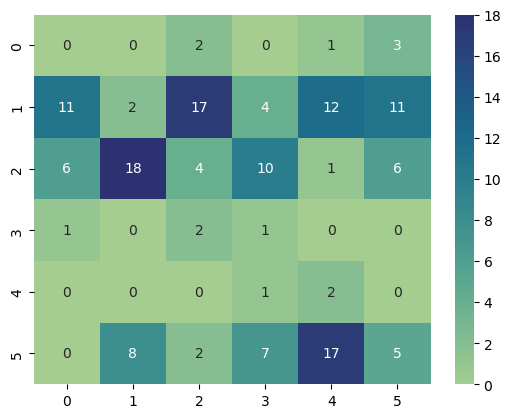

In [338]:
dataset_for_ari[dataset_for_ari['Type']=='op']['Study_OID'].unique()

array(['SE_UDUS_PROSP', 'SE_MAASTRO_PROSP', 'SE_INT_PROSP',
       'SE_BRESCIA_PROSP', 'SE_AOP_RETRO', 'SE_INT_RETRO',
       'SE_UDUS_RETRO', 'SE_MAASTRO_RETRO', 'SE_VUMC_RETRO'], dtype=object)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 0]


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


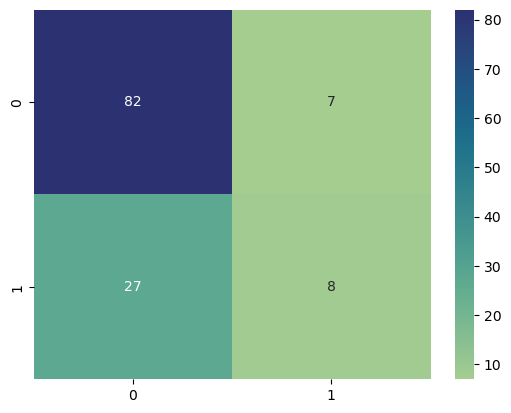

In [360]:
c = print_confusion_matrix(5, 2, dataset_for_ari[dataset_for_ari['Type']=='op'], 'No treatment')

In [168]:
c = dataset_for_ari

In [354]:
dataset_for_ari[dataset_for_ari['Type']=='op']['No treatment'].unique()

array([0, 1], dtype=int64)

In [342]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import umap

def print_confusion_matrix2(n, clusters, df, col):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')

    # Riduzione della dimensionalità per ciascun dataset
    oc_r = reducer.fit_transform(df_op_recidiva_1000)

    # Applicazione del clustering con KMeans
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    labels_r = kmeans.fit_predict(oc_r)
    print(labels_r)
    
    # Mapping
    mapping = {'SE_UDUS_PROSP': 0,'SE_MAASTRO_PROSP':1, 'SE_INT_PROSP': 2, 'SE_BRESCIA_PROSP': 3,'SE_BRESCIA_PROSP': 3,'SE_AOP_RETRO': 4,'SE_INT_RETRO': 5,'SE_UDUS_RETRO': 6,'SE_MAASTRO_RETRO': 7, 'SE_VUMC_RETRO':8 }
    reverse_mapping = {v: k for k, v in mapping.items()}
    
    # Convertire le etichette in stringhe
    true_labels = df[col].astype(str)
    
    # Map dei numeri ai nomi originali per le etichette predette
    pred_labels = pd.Series(labels_r, index=true_labels.index).map(reverse_mapping).fillna('Unknown')
    
    # Etichette combinate
    all_labels = sorted(set(true_labels) | set(pred_labels))

    # Calcolo della matrice di confusione
    cm = confusion_matrix(true_labels, pred_labels, labels=all_labels)

    # Visualizzazione della matrice di confusione
    sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=all_labels, yticklabels=all_labels)
    return cm


[1 1 3 8 8 7 1 1 7 4 2 8 8 6 1 8 2 1 3 2 8 2 8 1 2 7 8 0 2 7 2 8 3 0 0 3 6
 5 0 0 4 0 6 5 3 6 0 4 0 2 2 0 0 0 0 0 7 0 7 7 5 7 1 5 4 5 4 8 6 0 6 4 6 0
 0 5 0 6 4 6 8 1 0 5 6 4 6 2 3 5 0 2 5 5 5 5 5 1 5 0 4 4 4 3 3 0 5 3 3 4 3
 5 2 1 2 3 2 6 3 3 3 0 3 2]


C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[ 0,  2,  0,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  6,  0,  3,  2,  1,  1,  6],
       [ 2,  1,  2,  3,  0,  4, 11,  2,  0],
       [ 1,  0,  1,  0,  2,  2,  0,  0,  0],
       [ 2,  0,  0,  1,  1,  0,  5,  5,  1],
       [ 0,  1,  0,  0,  2,  0,  0,  0,  2],
       [ 2,  0,  0,  2,  1,  0,  0,  0,  1],
       [ 5, 11,  6, 10,  2,  0,  4,  3,  0]], dtype=int64)

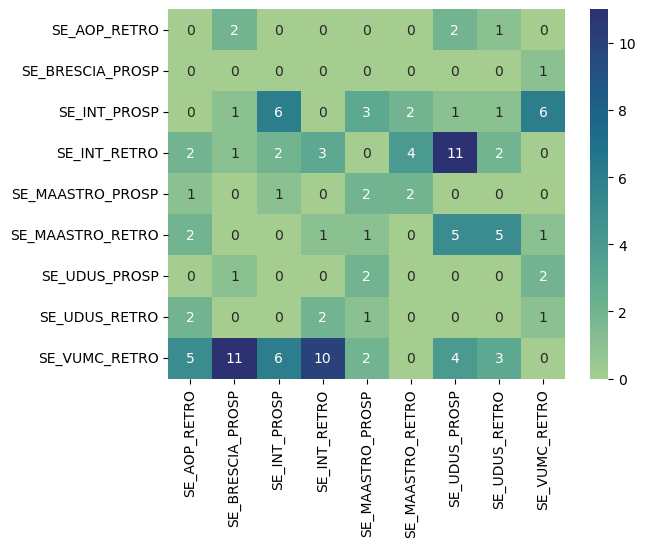

In [344]:
print_confusion_matrix2(95, 9, dataset_for_ari[dataset_for_ari['Type']=='op'], 'Study_OID')

In [160]:
mapping = {'UDUS': 0, 'INT': 1, 'AOP': 2, 'BRESCIA': 3, 'MAASTRO': 4, 'VUMC': 5}

# Sostituzione solo per le righe con Type == 'oc'
c = dataset_for_ari.loc[dataset_for_ari['Type'] == 'oc']
# c['Study_Name'].replace(mapping)

In [172]:
mapping = {'UDUS': 0, 'INT': 1, 'AOP': 2, 'BRESCIA': 3, 'MAASTRO': 4, 'VUMC': 5}

# Sostituzione solo per le righe con Type == 'oc'
c.loc[c['Type'] == 'oc', 'Study_Name'] = c['Study_Name'].replace(mapping)


In [176]:
c[c['Type']=='oc']

,Type,Patient_ID,Study_Name,Study_OID,Study_Start_Date,clinical_Age_at_Diagnosis,clinical_Date_of_first_Diagnosis,clinical_Hospital,clinical_Sex,ctn_Anatomical_Tumor_Location,...,Other,RT,Surgery,follow_Type_of_Recurrence_Delayed lymp node metastasis,follow_Type_of_Recurrence_Distant metastasis,follow_Type_of_Recurrence_Local,follow_Type_of_Recurrence_Locoregional,follow_Type_of_Recurrence_Regional,follow_Type_of_Recurrence_Second primary tumor,Study_Start_Date_Year
SS_UDUS148,oc,SS_UDUS148,0,SE_UDUS_PROSP,2018-01-06,73,2016-03-01,UDUS,Female,C04.9,...,0,0,1,1,0,0,0,0,0,2018
SS_INT_MI_0045,oc,SS_INT_MI_0045,1,SE_INT_PROSP,2017-11-14,66,2015-10-01,INT,Female,C04,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_MI_0103,oc,SS_INT_MI_0103,1,SE_INT_PROSP,2017-11-14,75,2016-02-01,INT,Female,C06.2,...,0,0,0,0,0,1,0,0,0,2017
SS_INT_MI_0055,oc,SS_INT_MI_0055,1,SE_INT_PROSP,2017-11-14,68,2016-04-15,INT,Male,C01,...,0,0,0,0,0,0,1,0,0,2017
SS_INT_0064,oc,SS_INT_0064,1,SE_INT_PROSP,2017-08-04,32,2017-05-17,INT,Male,C02.1,...,0,0,1,0,0,0,0,1,0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_110,oc,SS_VUMC_110,5,SE_VUMC_RETRO,2017-06-27,54,2010-03-11,VUMC,Male,C02.1,...,0,0,0,0,0,0,0,0,1,2017
SS_VUMC_166,oc,SS_VUMC_166,5,SE_VUMC_RETRO,2017-06-29,49,2010-12-09,VUMC,Male,C04.0,...,0,0,0,0,1,0,0,0,0,2017
SS_VUMC_175,oc,SS_VUMC_175,5,SE_VUMC_RETRO,2017-07-10,55,2011-03-29,VUMC,Male,C04.0,...,0,0,1,0,0,1,0,0,0,2017
SS_VUMC_202,oc,SS_VUMC_202,5,SE_VUMC_RETRO,2017-07-20,65,2011-08-01,VUMC,Male,C04.0,...,0,0,0,0,1,0,0,0,0,2017


In [214]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

def cluster_groups(df, n1,cluster,col,dataset_for_ari):
    n = n1
    patient_names = df.columns.tolist()
    
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    df_r = reducer.fit_transform(df.T)
    
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    labels_r = kmeans.fit_predict(df_r)
    print(labels_r)
    
     # Stampa delle etichette di clustering
    cluster_dict_r = {}
    for idx, label in enumerate(labels_r):
        if label not in cluster_dict_r:
            cluster_dict_r[label] = []
        cluster_dict_r[label].append(patient_names[idx])
        print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
    
    
    score_r = silhouette_score(df_r, labels_r) if len(set(labels_r)) > 1 else None
    ari_r = adjusted_rand_score(dataset_for_ari[col], labels_r)
    print(f"\n ARI: {ari_r:.2f}")
    
    # Visualizzazione dei cluster
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels_r)
    
    for label in unique_labels:
        mask = labels_r == label
        plt.scatter(
            df_r[mask, 0],
            df_r[mask, 1],
            label=f"Cluster {label}",
            alpha=0.6
        )
    plt.title(f"Clustering con KMeans (n_neighbors={n})")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()
    plt.grid(True)
    plt.show()

    return



# # VALORI ARS OTTIMO 40,60,41,100,150
# # Inizializzazione
# max_ari_r = -1
# neighbours = [35]

# # Lista con i nomi dei pazienti
# patient_names = df_oc_vivi_con_ricorrenza.columns.tolist() + df_op_vivi_con_ricorrenza.columns.tolist() + df_hy_vivi_con_ricorrenza.columns.tolist() + df_la_vivi_con_ricorrenza.columns.tolist()

# for n in neighbours:
#     reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, n_components=2, random_state=42, metric='cosine')
    
#     # Riduzione della dimensionalità per ciascun dataset
#     oc_r = reducer.fit_transform(df_oc_vivi_con_ricorrenza.T)
#     op_r = reducer.fit_transform(df_op_vivi_con_ricorrenza.T)
#     hy_r = reducer.fit_transform(df_hy_vivi_con_ricorrenza.T)
#     la_r = reducer.fit_transform(df_la_vivi_con_ricorrenza.T)
    
#     # Concatenazione dei risultati UMAP
#     combined_embedding_r = np.vstack([oc_r, op_r, hy_r, la_r])
    
#     # Applicazione del clustering con KMeans
#     kmeans = KMeans(n_clusters=2, random_state=42)
#     labels_r = kmeans.fit_predict(combined_embedding_r)
#     print(labels_r)
    
#     # Stampa delle etichette di clustering
#     cluster_dict_r = {}
#     for idx, label in enumerate(labels_r):
#         if label not in cluster_dict_r:
#             cluster_dict_r[label] = []
#         cluster_dict_r[label].append(patient_names[idx])
#         print(f"ID paziente: {idx}, Nome: {patient_names[idx]}, Cluster: {label}")
        
#     print(f"\nClustering con n_neighbors={n}")
#     for cluster_id, patients in cluster_dict_r.items():
#         print(f"Cluster {cluster_id}: {patients}")
    
#     # Calcolo delle metriche
#     score_r = silhouette_score(combined_embedding_r, labels_r) if len(set(labels_r)) > 1 else None
#     ari_r = adjusted_rand_score(combined_dataset_r['Status_Alive'], labels_r)
    
#     if ari_r > max_ari_r:
#         max_ari_r = ari_r
#         print(f"\nNuovo miglior ARI: {ari_r:.2f}")
#         print(f"Silhouette Score: {score_r:.2f}" if score_r is not None else "Silhouette Score non calcolabile.")
#         print('Neighbours =', n)
    
#     # Visualizzazione dei cluster
#     plt.figure(figsize=(10, 8))
#     unique_labels = set(labels_r)
#     for label in unique_labels:
#         mask = labels_r == label
#         plt.scatter(
#             combined_embedding_r[mask, 0],
#             combined_embedding_r[mask, 1],
#             label=f"Cluster {label}",
#             alpha=0.6
#         )
#     plt.title(f"Clustering con KMeans (n_neighbors={n})")
#     plt.xlabel("UMAP Dimension 1")
#     plt.ylabel("UMAP Dimension 2")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# print(f"\nMiglior ARI: {max_ari_r:.2f}")


In [200]:
df_oc_recidiva_1000

,4923,5930,17921,3238,4577,2766,17742,24357,4181,2602,...,2281,12589,9922,2130,4126,4176,23203,23191,6460,25044
SS_UDUS148,-0.259690,-0.965972,-1.181781,-0.606291,-0.246611,-1.194860,0.531608,-0.187754,1.440619,-0.619371,...,-1.090225,2.957818,-0.390483,1.708745,2.146902,1.447159,-1.096765,2.244996,1.087478,-0.586672
SS_INT_MI_0045,3.653190,-0.391319,-1.042414,-0.567887,-0.485121,-0.783080,1.705425,2.643442,5.970645,4.536030,...,-0.065772,4.364980,0.634982,3.233842,2.831046,1.749567,-0.722384,2.301342,1.164686,0.844656
SS_INT_MI_0103,4.753460,2.310341,-0.553039,-0.446573,1.755596,0.887056,7.213390,0.640503,-0.631488,-0.861231,...,0.612486,3.873713,0.124982,2.579308,2.596119,2.556894,0.864642,3.352589,1.419387,-0.099157
SS_INT_MI_0055,2.964498,0.515983,-0.604253,-0.369537,1.188124,0.270598,4.287443,0.281267,3.092525,-0.204169,...,0.526652,4.500821,0.820047,3.044515,2.329698,2.244346,0.681351,2.308360,1.764245,0.185247
SS_INT_0064,-0.883747,-0.777720,-0.891903,-0.590133,-0.263895,-1.258921,0.698507,-1.275233,-1.405728,-1.299701,...,-0.663537,0.494608,0.021563,-0.027373,0.331489,1.611973,-0.435170,1.244956,0.143902,0.355957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS_VUMC_110,0.328766,-0.220173,-0.981202,-0.781588,-0.881395,-0.974964,1.457834,0.085486,3.310503,0.478477,...,0.372431,3.840728,0.478477,1.177126,2.736612,1.913204,0.347480,2.842657,1.308123,-0.270077
SS_VUMC_166,-0.425644,-0.030608,-0.731659,5.188326,0.069542,-0.403389,0.614804,3.580360,0.342173,-0.681584,...,0.798412,4.097802,0.447887,2.551039,4.848928,1.315855,-0.692711,1.488335,1.605177,-0.258728
SS_VUMC_175,-0.576873,-0.869919,-1.131284,-0.608554,-0.355109,-1.210485,0.714111,2.052617,0.571548,-1.258006,...,-1.558972,-0.513512,-0.814478,0.381465,1.363564,1.197240,-0.846158,-0.204626,0.547788,0.508187
SS_VUMC_202,4.861496,-0.605648,-0.924057,-0.443057,-0.544676,-0.483704,0.105690,-1.418606,0.979620,-0.558226,...,-0.700493,2.741030,0.132789,2.944269,1.589339,1.447071,-0.104324,2.415847,0.417324,0.369902


In [218]:
dataset_for_ari[dataset_for_ari['Type']=='oc']['Study_OID'].unique()

array(['SE_UDUS_PROSP', 'SE_INT_PROSP', 'SE_AOP_PROSP',
       'SE_BRESCIA_PROSP', 'SE_AOP_RETRO', 'SE_INT_RETRO',
       'SE_UDUS_RETRO', 'SE_MAASTRO_RETRO', 'SE_VUMC_RETRO'], dtype=object)

C:\Users\matti\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 0]
ID paziente: 0, Nome: SS_UDUS115, Cluster: 0
ID paziente: 1, Nome: SS_UDUS126, Cluster: 0
ID paziente: 2, Nome: SS_UDUS133, Cluster: 1
ID paziente: 3, Nome: SS_UDUS163, Cluster: 0
ID paziente: 4, Nome: SS_UDUS140, Cluster: 0
ID paziente: 5, Nome: SS_MAASTRO_5588, Cluster: 0
ID paziente: 6, Nome: SS_MAASTRO_588, Cluster: 0
ID paziente: 7, Nome: SS_MAASTRO_7265, Cluster: 0
ID paziente: 8, Nome: SS_MAASTRO_5082, Cluster: 0
ID paziente: 9, Nome: SS_MAASTRO_8441, Cluster: 0
ID paziente: 10, Nome: SS_MAASTRO_6905, Cluster: 0
ID paziente: 11, Nome: SS_INT_0266, Cluster: 0
ID paziente: 12, Nome: SS_INT_0020, Cluster: 0
ID paziente: 13, Nome: SS_INT_0197, Cluster: 0
ID paziente: 14, Nome: SS_INT_0220, Cluster: 0
ID paziente: 15, Nome: SS_INT_0249

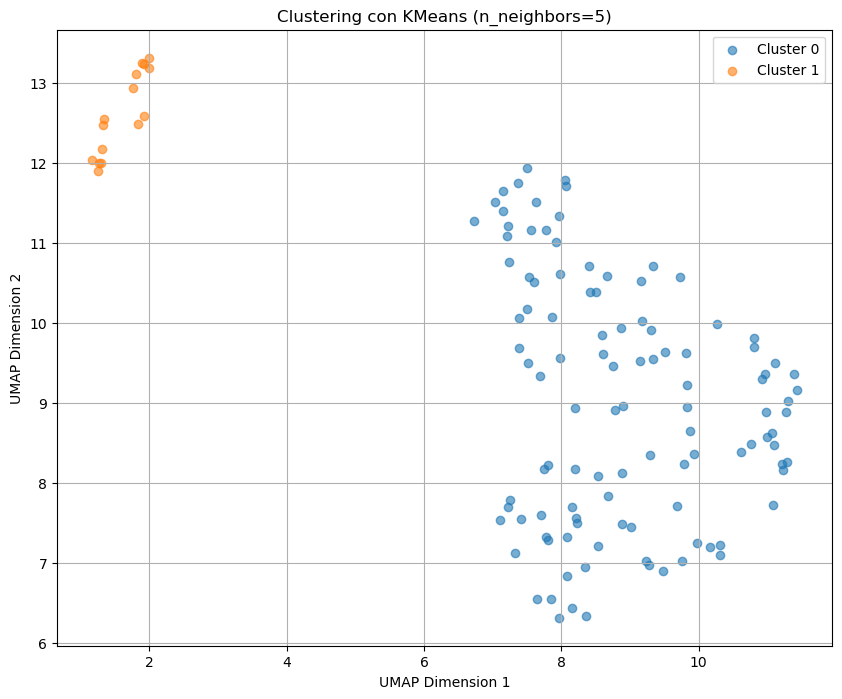

In [350]:
cluster_groups(df_op_recidiva_1000.T, 5, 2, 'No treatment', dataset_for_ari[dataset_for_ari['Type']=='op'])